In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")



In [2]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [3]:
df['City_Code'] = [int(x[1:].strip()) for x in df['City_Code']]
test['City_Code'] = [int(x[1:].strip()) for x in test['City_Code']]

In [4]:
from scipy.stats import boxcox

(array([14322.,  9219.,  7269.,  5752.,  4715.,  3702.,  2757.,  1796.,
          940.,   410.]),
 array([1.0000e+00, 6.2030e+02, 1.2396e+03, 1.8589e+03, 2.4782e+03,
        3.0975e+03, 3.7168e+03, 4.3361e+03, 4.9554e+03, 5.5747e+03,
        6.1940e+03]),
 <a list of 10 Patch objects>)

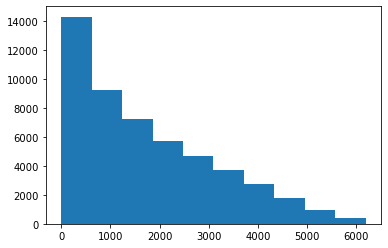

In [5]:
plt.hist(df['Region_Code'])

(array([2984., 4985., 5901., 6683., 7216., 7035., 6270., 5199., 3412.,
        1197.]),
 array([ 1.        ,  8.77019695, 16.5403939 , 24.31059084, 32.08078779,
        39.85098474, 47.62118169, 55.39137864, 63.16157558, 70.93177253,
        78.70196948]),
 <a list of 10 Patch objects>)

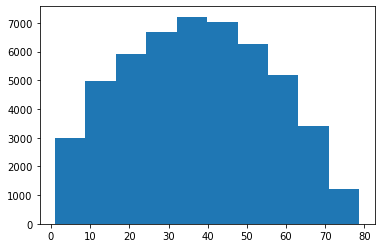

In [6]:
plt.hist(np.power(df['Region_Code'],1/2))

In [7]:
df['Region_Code']=np.power(df['Region_Code'],1/2)# we will replace city code with region code
test['Region_Code']=np.power(test['Region_Code'],1/2)

In [8]:
df['Region_Code'].value_counts()

1.000000     96
2.236068     75
2.000000     73
2.449490     73
1.414214     73
             ..
75.179785     1
77.285186     1
76.524506     1
73.034239     1
78.428311     1
Name: Region_Code, Length: 5316, dtype: int64

In [9]:
import seaborn as sns

In [10]:
data_correlation = df.corr()

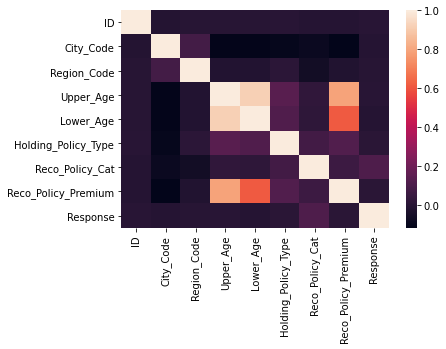

In [11]:
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

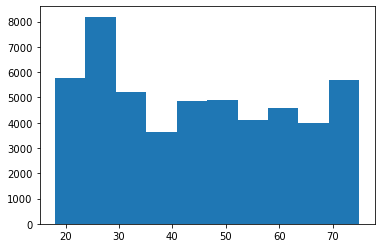

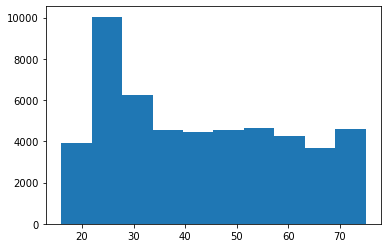

In [12]:
# we can see upper age and lower age are higly correlated 
plt.hist(df['Upper_Age'])
plt.show()
plt.hist(df['Lower_Age'])
plt.show()

In [13]:
df['Reco_Policy_Cat'].value_counts()

22    6602
18    5553
21    5027
16    4084
17    3756
19    3708
20    3177
12    2168
1     1967
2     1917
14    1742
13    1684
15    1615
3     1059
4     1015
5     1007
6      851
7      834
9      789
11     781
8      776
10     770
Name: Reco_Policy_Cat, dtype: int64

(array([ 4835., 12137., 12509.,  9889.,  6100.,  2901.,  1599.,   677.,
          196.,    39.]),
 array([ 2280.  ,  6387.04, 10494.08, 14601.12, 18708.16, 22815.2 ,
        26922.24, 31029.28, 35136.32, 39243.36, 43350.4 ]),
 <a list of 10 Patch objects>)

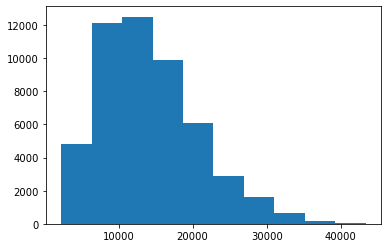

In [14]:
plt.hist(df['Reco_Policy_Premium'])

(array([  104.,   902.,  2181.,  4188.,  7731., 10832., 11816.,  8791.,
         3700.,   637.]),
 array([ 7.73193072,  8.02644477,  8.32095882,  8.61547287,  8.90998692,
         9.20450097,  9.49901501,  9.79352906, 10.08804311, 10.38255716,
        10.67707121]),
 <a list of 10 Patch objects>)

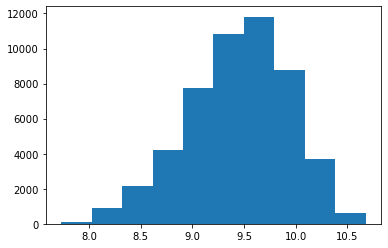

In [15]:
plt.hist(np.log(df['Reco_Policy_Premium']))

In [16]:
df['Reco_Policy_Premium']=np.log(df['Reco_Policy_Premium'])
test['Reco_Policy_Premium']=np.log(test['Reco_Policy_Premium'])

In [17]:
(df.isnull().sum()/df.shape[0])*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [18]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3,56.683331,Rented,Individual,36,36,No,X1,14+,3.0,22,9.361171,0
1,2,5,33.421550,Owned,Joint,75,22,No,X2,NaN,NaN,22,10.325810,0
2,3,5,61.090097,Owned,Individual,32,32,No,NaN,1.0,1.0,19,8.915969,1
3,4,24,66.166457,Owned,Joint,52,48,No,X1,14+,3.0,19,9.785830,0
4,5,8,46.797436,Rented,Individual,44,44,No,X2,3.0,1.0,16,9.249946,0


# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Accomodation_Type'])
df['Accomodation_Type']= pd.Series(le.transform(df['Accomodation_Type']))
test['Accomodation_Type']= pd.Series(le.transform(test['Accomodation_Type']))
le = LabelEncoder()
le.fit(df['Reco_Insurance_Type'])
df['Reco_Insurance_Type']= pd.Series(le.transform(df['Reco_Insurance_Type']))
test['Reco_Insurance_Type']= pd.Series(le.transform(test['Reco_Insurance_Type']))
le = LabelEncoder()
le.fit(df['Is_Spouse'])
df['Is_Spouse']= pd.Series(le.transform(df['Is_Spouse']))
test['Is_Spouse']= pd.Series(le.transform(test['Is_Spouse']))

In [20]:
df['Holding_Policy_Duration'][df['Holding_Policy_Duration']=='14+']=float(15)
test['Holding_Policy_Duration'][test['Holding_Policy_Duration']=='14+']=float(15)


<ipython-input-20-bd06c3db9bed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holding_Policy_Duration'][df['Holding_Policy_Duration']=='14+']=float(15)
<ipython-input-20-bd06c3db9bed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Holding_Policy_Duration'][test['Holding_Policy_Duration']=='14+']=float(15)


In [21]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3,56.683331,1,0,36,36,0,X1,15,3.0,22,9.361171,0
1,2,5,33.421550,0,1,75,22,0,X2,NaN,NaN,22,10.325810,0
2,3,5,61.090097,0,0,32,32,0,NaN,1.0,1.0,19,8.915969,1
3,4,24,66.166457,0,1,52,48,0,X1,15,3.0,19,9.785830,0
4,5,8,46.797436,1,0,44,44,0,X2,3.0,1.0,16,9.249946,0


In [22]:
import stats

In [23]:
df['Health Indicator'] = df['Health Indicator'].fillna(stats.mode(df['Health Indicator']))

In [24]:
test['Health Indicator'] = test['Health Indicator'].fillna(stats.mode(test['Health Indicator']))

In [25]:
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].fillna(stats.mode(df['Holding_Policy_Type']))


In [26]:
test['Holding_Policy_Type'] = df['Holding_Policy_Type'].fillna(stats.mode(test['Holding_Policy_Type']))


In [27]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Holding_Policy_Duration']=imputer.fit_transform(np.array(df['Holding_Policy_Duration']).reshape(-1, 1))
test['Holding_Policy_Duration']=imputer.fit_transform(np.array(test['Holding_Policy_Duration']).reshape(-1, 1))


In [34]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3,56.683331,1,0,36,36,0,0,15.000000,3.0,22,9.361171,0
1,2,5,33.421550,0,1,75,22,0,1,6.156769,3.0,22,10.325810,0
2,3,5,61.090097,0,0,32,32,0,0,1.000000,1.0,19,8.915969,1
3,4,24,66.166457,0,1,52,48,0,0,15.000000,3.0,19,9.785830,0
4,5,8,46.797436,1,0,44,44,0,1,3.000000,1.0,16,9.249946,0


In [35]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,1,12.489996,0,0,30,30,0,0,6.000000,3.0,5,9.387147
1,50884,4,2.645751,0,1,69,68,1,0,3.000000,3.0,18,10.379871
2,50885,1,23.748684,1,0,28,28,0,2,2.000000,1.0,17,9.131297
3,50886,3,34.307434,1,0,23,23,0,2,3.000000,3.0,18,9.114490
4,50887,1,30.838288,0,0,75,75,0,2,6.193834,1.0,5,10.022781


In [32]:
le = LabelEncoder()
le.fit(df['Health Indicator'])
df['Health Indicator']= pd.Series(le.transform(df['Health Indicator']))
test['Health Indicator']= pd.Series(le.transform(test['Health Indicator']))

In [33]:
df.to_csv("df.csv",index=False)
test.to_csv("modtest.csv",index=False)


# Model Building

In [3]:
df=pd.read_csv('imputedtrain.csv')
test=pd.read_csv('imputedtest.csv')

In [4]:
X = df.drop(['ID','Response'],axis=1)
y = df['Response']

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

1
2
3
4
5
6
7
8
9


Text(0.5, 1.0, 'DEPTH vs ACCURACY')

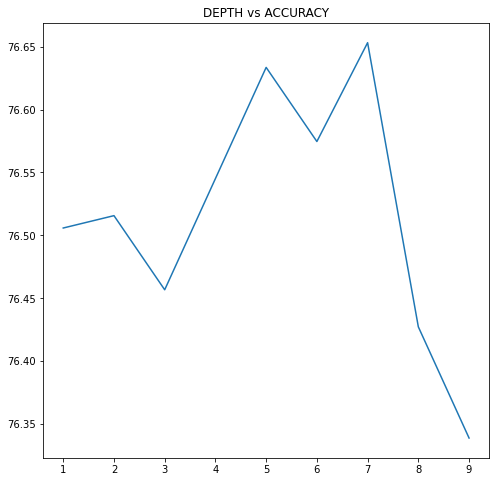

In [9]:
gx = []
gy = []
for i in range(1,10):
    gx.append(i)
    print(i)
    xb = GradientBoostingClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=i)
    xb.fit(X_train,y_train)
    gy.append(100*xb.score(X_test,y_test))
plt.figure(figsize=(8,8))  
plt.plot(gx,gy)
plt.title("DEPTH vs ACCURACY")

# 7

81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156


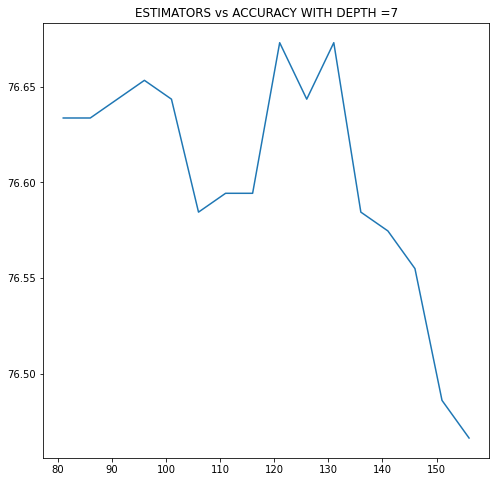

In [11]:
gx = []
gy = []
for i in range(81,160,5):
    gx.append(i)
    print(i)
    xb = GradientBoostingClassifier(random_state=0,  learning_rate=0.1, n_estimators=i, max_depth=7)
    xb.fit(X_train,y_train)
    gy.append(100*xb.score(X_test,y_test))
plt.figure(figsize=(8,8))  
plt.plot(gx,gy)
plt.title("ESTIMATORS vs ACCURACY WITH DEPTH =7")
ax = plt
plt.show()

# 80

0.0001
0.001
0.01
0.1


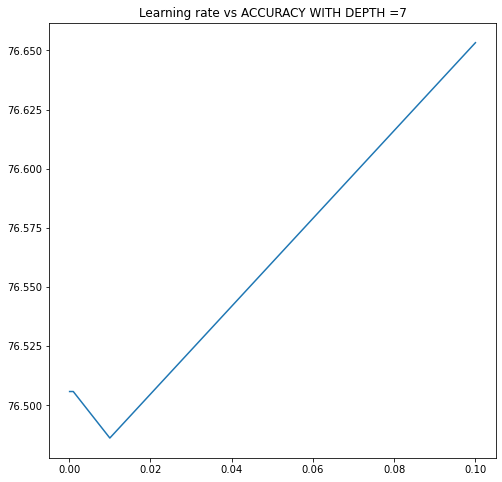

In [13]:
gx = []
gy = []
for i in [0.0001,0.001,0.01,0.1]:
    gx.append(i)
    print(i)
    xb = GradientBoostingClassifier(random_state=0,  learning_rate=i, n_estimators=80, max_depth=7)
    xb.fit(X_train,y_train)
    gy.append(100*xb.score(X_test,y_test))
plt.figure(figsize=(8,8))  
plt.plot(gx,gy)
plt.title("Learning rate vs ACCURACY WITH DEPTH =7")
ax = plt
plt.show()

In [14]:
clf = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1,max_depth=7, random_state=0).fit(X,y)


In [15]:
out = clf.predict_proba(test.drop(['ID'],axis=1))

In [70]:
ot = pd.DataFrame()
ot['ID']=test['ID']
ot['Response'] = pd.Series(out[:,1])
ot.to_csv("output.csv",index=False)

In [16]:
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 1.0, 'Estimators vs Accuracy')

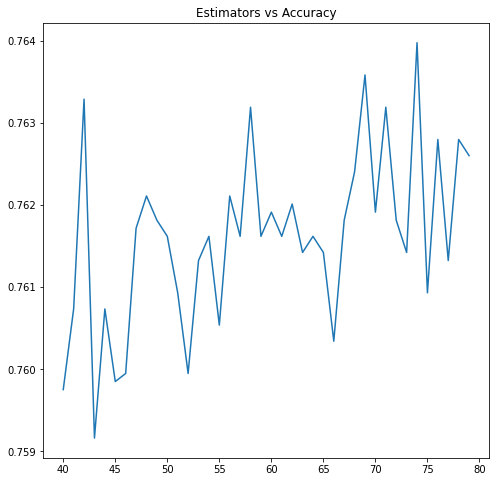

In [21]:
gx = []
gy = []
for i in range(40,80):
    gx.append(i)
    clf = RandomForestClassifier(n_estimators=i)
    clf = clf.fit(X_train,y_train)
    clf.predict(X_test)
    gy.append(clf.score(X_test,y_test))
plt.figure(figsize=(8,8))    
plt.plot(gx,gy)
plt.title("Estimators vs Accuracy")

In [22]:
clf2 = RandomForestClassifier(n_estimators=80).fit(X,y)

In [23]:
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB().fit(X,y)


# Ensemling

In [75]:
out1 = clf.predict_proba(test.drop(['ID'],axis=1))[:,1]
out2 = clf2.predict_proba(test.drop(['ID'],axis=1))[:,1]
out3 = clf3.predict_proba(test.drop(['ID'],axis=1))[:,1]

In [80]:
out = (out1+out2+out3)/3

In [82]:
ot = pd.DataFrame()
ot['ID']=test['ID']
ot['Response'] = pd.Series(out)
ot.to_csv("output.csv",index=False)

# 0.64

In [130]:
df = pd.read_csv("df.csv")
test = pd.read_csv("modtest.csv")

In [24]:
from sklearn.neural_network import MLPClassifier

In [28]:
clf4= MLPClassifier(random_state=1,max_iter=120, activation='logistic',solver='sgd',learning_rate="adaptive").fit(X_train, y_train)
clf4.score(X_test,y_test)

0.7650584651665521

In [32]:
from sklearn.ensemble import AdaBoostClassifier
clf5= AdaBoostClassifier(n_estimators=120, random_state=0).fit(X,y)

Text(0.5, 1.0, 'Estimators vs Accuracy')

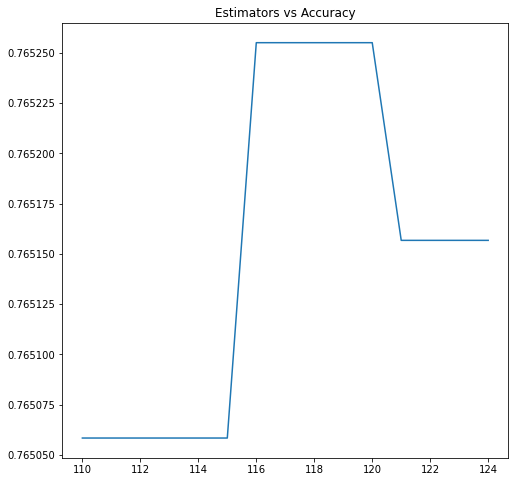

In [31]:
gx = []
gy = []
for i in range(110,125):
    gx.append(i)
    clf = AdaBoostClassifier(n_estimators=i)
    clf = clf.fit(X_train,y_train)
    clf.predict(X_test)
    gy.append(clf.score(X_test,y_test))
plt.figure(figsize=(8,8))    
plt.plot(gx,gy)
plt.title("Estimators vs Accuracy")

In [34]:
out1 = clf.predict_proba(test.drop(['ID'],axis=1))[:,1]
out2 = clf2.predict_proba(test.drop(['ID'],axis=1))[:,1]
out3 = clf3.predict_proba(test.drop(['ID'],axis=1))[:,1]
out4 = clf4.predict_proba(test.drop(['ID'],axis=1))[:,1]
out5 = clf5.predict_proba(test.drop(['ID'],axis=1))[:,1]


In [35]:
out = (out1+out2+out3+out4+out5)/5

In [36]:
ot = pd.DataFrame()
ot['ID']=test['ID']
ot['Response'] = pd.Series(out)
ot.to_csv("output.csv",index=False)

In [192]:
clf.score(X_test,y_test)

0.7971897415741378

# now imputing the missing values in data 

In [22]:
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [23]:
misscols = ['Health Indicator','Holding_Policy_Duration', 'Holding_Policy_Type']

In [24]:
miss = df.drop(misscols,axis=1)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
def impute_by(a,hi):
    tr =  hi[hi[a].notnull()]
    ts = hi[hi[a].isnull()]
    X = tr[hi.drop(misscols,axis=1).columns]
    y = tr[a]
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0).fit(X, y)
    out = clf.predict(ts.drop(misscols,axis=1))
    ts[a]=out
    

In [26]:
impute_by("Health Indicator",df.drop(['ID'],axis=1))

<ipython-input-25-0f93d9d2fbdd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts[a]=out


NameError: name 'ts' is not defined

In [27]:
misscols = ['Holding_Policy_Duration', 'Holding_Policy_Type']

In [28]:
impute_by('Holding_Policy_Duration',df.drop(['ID'],axis=1))

ValueError: could not convert string to float: 'X1'

In [ ]:
misscols = [ 'Holding_Policy_Type']

In [ ]:
impute_by('Holding_Policy_Type',df.drop(['ID'],axis=1))